In [45]:
from imblearn.combine import SMOTEENN
import pandas as pd
from sklearn.preprocessing import FunctionTransformer,StandardScaler
import numpy as np
import seaborn as sns
from imblearn.pipeline import Pipeline
from dataprocessing import load_data,add_diabetes,impute,one_hot_encode,add_bodytype,add_missing_cols,get_all_tags,add_preexisting
import matplotlib.pyplot as plt

In [46]:
def pipeline():
    """
    create the pipeline for the model, and optimize with gridsearch
    """
    full_df = pd.read_csv("../data/healthcare-dataset-stroke-data.csv").drop(columns = ["stroke",'id'],axis=1)
    #transform functions to make the pipeline work
    one_hot_encode_transformed = FunctionTransformer(one_hot_encode)
    impute_transformed = FunctionTransformer(impute)
    add_bodytype_transformed = FunctionTransformer(add_bodytype)
    add_diabetes_transformed = FunctionTransformer(add_diabetes)
    add_preexisting_transformed = FunctionTransformer(add_preexisting)
    add_missing_cols_transformed = FunctionTransformer(add_missing_cols,kw_args={"total_tags":get_all_tags(full_df)})


    pipeline = Pipeline([

  
    ("add_bodytype",add_bodytype_transformed),
    ("add_diabetes",add_diabetes_transformed),
    ("add_preexisting",add_preexisting_transformed),
    ("impute",impute_transformed),
    ("one_hot_encode",one_hot_encode_transformed)])
    #("add_missing_cols",add_missing_cols_transformed)])
    #use all available threads
    #("over_under" , SMOTEENN())])

    return pipeline

In [47]:
#one hot encode and prepare data 
no_smoteen_data = pd.read_csv("../data/healthcare-dataset-stroke-data.csv",index_col="id")
model = pipeline()
data = model.fit_transform(no_smoteen_data)
#find the number of strokes in the data and non strokes
num_of_strokes = data["stroke"].sum()
num_of_non_strokes = data.shape[0] - num_of_strokes

       age  hypertension  heart_disease  avg_glucose_level        bmi  \
0     67.0           0.0            1.0             228.69  36.600000   
1     61.0           0.0            0.0             202.21  28.893237   
2     80.0           0.0            1.0             105.92  32.500000   
3     49.0           0.0            0.0             171.23  34.400000   
4     79.0           1.0            0.0             174.12  24.000000   
...    ...           ...            ...                ...        ...   
5105  80.0           1.0            0.0              83.75  28.893237   
5106  81.0           0.0            0.0             125.20  40.000000   
5107  35.0           0.0            0.0              82.99  30.600000   
5108  51.0           0.0            0.0             166.29  25.600000   
5109  44.0           0.0            0.0              85.28  26.200000   

      gender_Female  gender_Male  gender_Other  ever_married_No  \
0               0.0          1.0           0.0          

Text(0.5, 1.0, 'Users with strokes before SMOTEEN')

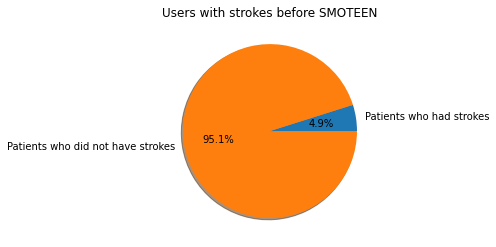

In [48]:
#plot the data in a pie chart
pie_chart = plt.pie([num_of_strokes,num_of_non_strokes],labels = ["Patients who had strokes","Patients who did not have strokes"],shadow = True,autopct='%1.1f%%')
plt.title('Users with strokes before SMOTEEN')

In [49]:
#use smoteen on that data
#seperate stroke data and X
y = data["stroke"]
X = data.drop(columns = ["stroke"],axis = 1)

smoteen = SMOTEENN()
smoteen_X, smoteen_y = smoteen.fit_resample(X,y)
smoteen_y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8252    1.0
8253    1.0
8254    1.0
8255    1.0
8256    1.0
Name: stroke, Length: 8257, dtype: float64

Text(0.5, 1.0, 'Users with strokes after SMOTEEN')

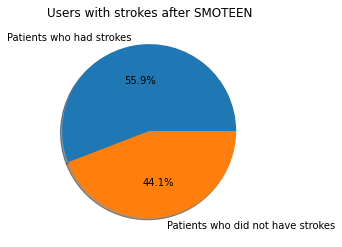

In [50]:
#find the number of strokes in the data and non strokes
num_of_strokes = smoteen_y.sum()
num_of_non_strokes = smoteen_y.shape[0] - num_of_strokes
#plot the data in a pie chart
pie_chart = plt.pie([num_of_strokes,num_of_non_strokes],labels = ["Patients who had strokes","Patients who did not have strokes"],shadow = True,autopct='%1.1f%%')
plt.title('Users with strokes after SMOTEEN')